In [1]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

In [2]:
def square(x: float) -> float:
    return x * x

In [3]:
def derivative(x: float) -> float:
    return 2 * x

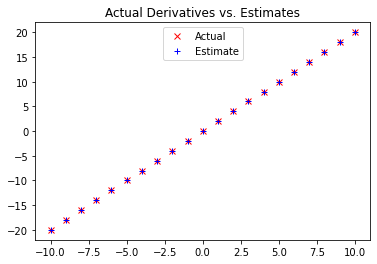

In [4]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9)
plt.show()

In [5]:
from typing import List

In [6]:
Vector = List[float]

In [7]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

In [8]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

In [9]:
from LinearAlgebra import distance, add, scalar_multiply

In [10]:
import random

In [11]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [12]:
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

0 [4.338364728610397, -3.821432612570487, -3.4144097941367417]
1 [4.25159743403819, -3.7450039603190772, -3.346121598254007]
2 [4.166565485357426, -3.670103881112696, -3.279199166288927]
3 [4.0832341756502775, -3.596701803490442, -3.213615182963148]
4 [4.001569492137272, -3.5247677674206335, -3.149342879303885]
5 [3.9215381022945266, -3.454272412072221, -3.0863560217178074]
6 [3.843107340248636, -3.3851869638307766, -3.0246289012834513]
7 [3.7662451934436634, -3.3174832245541612, -2.964136323257782]
8 [3.69092028957479, -3.251133560063078, -2.9048535967926266]
9 [3.6171018837832944, -3.1861108888618164, -2.846756524856774]
10 [3.5447598461076284, -3.12238867108458, -2.7898213943596386]
11 [3.473864649185476, -3.059940897662888, -2.734024966472446]
12 [3.4043873562017666, -2.9987420797096305, -2.679344467142997]
13 [3.3362996090777313, -2.938767238115438, -2.625757577800137]
14 [3.2695736168961766, -2.879991893353129, -2.5732424262441342]
15 [3.2041821445582532, -2.8223920554860666, -2.

952 [1.9255292483113232e-08, -1.6960953553372878e-08, -1.5154433376644182e-08]
953 [1.887018663345097e-08, -1.662173448230542e-08, -1.4851344709111298e-08]
954 [1.8492782900781948e-08, -1.6289299792659312e-08, -1.4554317814929071e-08]
955 [1.812292724276631e-08, -1.5963513796806127e-08, -1.426323145863049e-08]
956 [1.7760468697910982e-08, -1.5644243520870006e-08, -1.397796682945788e-08]
957 [1.7405259323952763e-08, -1.5331358650452606e-08, -1.3698407492868723e-08]
958 [1.7057154137473707e-08, -1.5024731477443555e-08, -1.3424439343011348e-08]
959 [1.6716011054724234e-08, -1.4724236847894683e-08, -1.315595055615112e-08]
960 [1.638169083362975e-08, -1.442975211093679e-08, -1.2892831545028099e-08]
961 [1.6054057016957154e-08, -1.4141157068718054e-08, -1.2634974914127537e-08]
962 [1.573297587661801e-08, -1.3858333927343692e-08, -1.2382275415844987e-08]
963 [1.541831635908565e-08, -1.3581167248796818e-08, -1.2134629907528087e-08]
964 [1.5109950031903938e-08, -1.3309543903820881e-08, -1.18919

In [13]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual).
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

In [14]:
from LinearAlgebra import vector_mean

In [16]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.410071775210795, -0.12363328260768686]
1 [11.050358492651792, -0.09997594426726084]
2 [25.964310909456984, -0.09872563388607448]
3 [16.016705897758307, -0.08256387170884542]
4 [22.6517746023235, -0.07638203806766938]
5 [18.226189958212156, -0.06357749938921056]
6 [21.1780677203731, -0.05522415443221998]
7 [19.20917360635671, -0.04393563840298241]
8 [20.52243726892167, -0.03463859351981972]
9 [19.646499703035726, -0.024046879063858377]
10 [20.230760651196107, -0.014352285602694984]
11 [19.841068293366593, -0.004092820380293443]
12 [20.1010033555041, 0.005756433553833694]
13 [19.92763651831232, 0.015845924042230106]
14 [20.043282288209724, 0.02574186871245799]
15 [19.966156455632827, 0.035733667263242834]
16 [20.017609377760166, 0.0456283563843492]
17 [19.983300173390354, 0.0555547090493407]
18 [20.006194339057682, 0.06542689980463234]
19 [19.99093380274833, 0.0753022403440808]
20 [20.00112245580721, 0.08514256966614099]
21 [19.994336464546258, 0.09497340698261596]
22 [19.998872551

665 [19.99918817200903, 3.6483059074492754]
666 [19.999189795177426, 3.6510084838063857]
667 [19.999191415100462, 3.6537056566339503]
668 [19.999193031784625, 3.6563974367357828]
669 [19.99919464523639, 3.659083834894096]
670 [19.999196255462223, 3.661764861869544]
671 [19.999197862468566, 3.664440528401267]
672 [19.999199466261867, 3.667110845206933]
673 [19.999201066848542, 3.669775822982781]
674 [19.999202664235007, 3.672435472403664]
675 [19.999204258427653, 3.6750898041230915]
676 [19.99920584943288, 3.677738828773273]
677 [19.99920743725704, 3.680382556965159]
678 [19.99920902190652, 3.6830209992884857]
679 [19.99921060338764, 3.6856541663118154]
680 [19.999212181706756, 3.6882820685825797]
681 [19.999213756870176, 3.6909047166271214]
682 [19.99921532888422, 3.693522120950737]
683 [19.999216897755176, 3.69613429203772]
684 [19.999218463489335, 3.6987412403513997]
685 [19.999220026092964, 3.7013429763341863]
686 [19.99922158557233, 3.703939510407611]
687 [19.999223141933665, 3.706

1365 [19.99980000189787, 4.66700303983946]
1366 [19.99980040177396, 4.667668833761679]
1367 [19.99980080085053, 4.66833329649593]
1368 [19.999801199129195, 4.668996430703788]
1369 [19.99980159661153, 4.669658239041509]
1370 [19.99980199329915, 4.670318724160038]
1371 [19.999802389193626, 4.670977888705017]
1372 [19.999802784296556, 4.6716357353168005]
1373 [19.999803178609515, 4.672292266630463]
1374 [19.999803572134084, 4.672947485275811]
1375 [19.99980396487184, 4.6736013938773935]
1376 [19.99980435682436, 4.67425399505451]
1377 [19.999804747993206, 4.674905291421226]
1378 [19.99980513837995, 4.675555285586376]
1379 [19.999805527986158, 4.676203980153583]
1380 [19.999805916813386, 4.676851377721262]
1381 [19.999806304863192, 4.677497480882633]
1382 [19.999806692137135, 4.678142292225731]
1383 [19.999807078636756, 4.678785814333416]
1384 [19.999807464363617, 4.679428049783386]
1385 [19.99980784931925, 4.6800690011481825]
1386 [19.99980823350521, 4.680708670995205]
1387 [19.99980861692

2061 [19.999950333390125, 4.917305064729826]
2062 [19.999950432693517, 4.9174704049337565]
2063 [19.99995053179836, 4.917635414556583]
2064 [19.99995063070505, 4.917800094259268]
2065 [19.99995072941399, 4.917964444701454]
2066 [19.99995082792557, 4.918128466541465]
2067 [19.999950926240185, 4.918292160436308]
2068 [19.999951024358232, 4.918455527041676]
2069 [19.999951122280102, 4.918618567011951]
2070 [19.999951220006185, 4.918781281000207]
2071 [19.999951317536876, 4.918943669658213]
2072 [19.999951414872562, 4.919105733636433]
2073 [19.999951512013638, 4.919267473584033]
2074 [19.999951608960487, 4.919428890148879]
2075 [19.999951705713503, 4.919589983977541]
2076 [19.99995180227307, 4.9197507557153]
2077 [19.999951898639576, 4.919911206006142]
2078 [19.999951994813408, 4.920071335492769]
2079 [19.99995209079495, 4.920231144816596]
2080 [19.999952186584586, 4.920390634617758]
2081 [19.999952282182697, 4.9205498055351065]
2082 [19.999952377589675, 4.920708658206219]
2083 [19.9999524

2757 [19.999987666022278, 4.979463919682507]
2758 [19.999987690682822, 4.979504979509164]
2759 [19.99998771529407, 4.979545957240829]
2760 [19.9999877398561, 4.979586853041641]
2761 [19.999987764369024, 4.979627667075414]
2762 [19.999987788832936, 4.979668399505632]
2763 [19.999987813247937, 4.979709050495454]
2764 [19.99998783761412, 4.979749620207711]
2765 [19.99998786193159, 4.9797901088049095]
2766 [19.999987886200433, 4.979830516449232]
2767 [19.99998791042076, 4.979870843302534]
2768 [19.999987934592657, 4.979911089526349]
2769 [19.999987958716225, 4.97995125528189]
2770 [19.99998798279156, 4.9799913407300425]
2771 [19.99998800681876, 4.980031346031374]
2772 [19.99998803079792, 4.980071271346129]
2773 [19.999988054729133, 4.980111116834235]
2774 [19.999988078612503, 4.980150882655296]
2775 [19.999988102448114, 4.980190568968598]
2776 [19.999988126236076, 4.980230175933109]
2777 [19.99998814997647, 4.980269703707479]
2778 [19.9999881736694, 4.98030915245004]
2779 [19.9999881973149

3458 [19.99999696753487, 4.994950943738318]
3459 [19.99999697359798, 4.994961038818376]
3460 [19.999996979648966, 4.994971113714337]
3461 [19.999996985687854, 4.994981168466557]
3462 [19.999996991714667, 4.994991203115312]
3463 [19.999996997729433, 4.995001217700796]
3464 [19.99999700373217, 4.995011212263124]
3465 [19.999997009722907, 4.99502118684233]
3466 [19.999997015701663, 4.995031141478369]
3467 [19.99999702166847, 4.9950410762111135]
3468 [19.99999702762334, 4.99505099108036]
3469 [19.999997033566313, 4.995060886125823]
3470 [19.999997039497394, 4.9950707613871375]
3471 [19.999997045416624, 4.99508061690386]
3472 [19.999997051324016, 4.995090452715469]
3473 [19.9999970572196, 4.995100268861362]
3474 [19.99999706310339, 4.995110065380859]
3475 [19.99999706897542, 4.995119842313201]
3476 [19.999997074835708, 4.995129599697551]
3477 [19.99999708068428, 4.995139337572991]
3478 [19.99999708652116, 4.995149055978529]
3479 [19.999997092346366, 4.995158754953093]
3480 [19.9999970981599

4129 [19.99999920829317, 4.998681807651276]
4130 [19.99999920987611, 4.998684443244267]
4131 [19.99999921145588, 4.9986870735676545]
4132 [19.999999213032496, 4.998689698631975]
4133 [19.999999214605957, 4.998692318447744]
4134 [19.999999216176274, 4.998694933025455]
4135 [19.99999921774345, 4.99869754237558]
4136 [19.999999219307494, 4.998700146508572]
4137 [19.99999922086841, 4.998702745434862]
4138 [19.999999222426204, 4.998705339164861]
4139 [19.999999223980886, 4.998707927708957]
4140 [19.99999922553246, 4.99871051107752]
4141 [19.999999227080927, 4.998713089280897]
4142 [19.9999992286263, 4.998715662329416]
4143 [19.999999230168587, 4.998718230233384]
4144 [19.999999231707786, 4.998720793003085]
4145 [19.99999923324391, 4.9987233506487865]
4146 [19.99999923477696, 4.998725903180733]
4147 [19.999999236306948, 4.998728450609149]
4148 [19.999999237833876, 4.998730992944237]
4149 [19.99999923935775, 4.998733530196183]
4150 [19.999999240878577, 4.998736062375148]
4151 [19.999999242396

4788 [19.999999788279293, 4.999647484894788]
4789 [19.999999788702606, 4.999648189713278]
4790 [19.999999789125074, 4.999648893122553]
4791 [19.9999997895467, 4.999649595125433]
4792 [19.99999978996748, 4.999650295724729]
4793 [19.999999790387417, 4.999650994923247]
4794 [19.999999790806516, 4.999651692723788]
4795 [19.999999791224777, 4.999652389129147]
4796 [19.999999791642203, 4.999653084142113]
4797 [19.99999979205879, 4.999653777765471]
4798 [19.99999979247455, 4.999654470001999]
4799 [19.999999792889476, 4.999655160854469]
4800 [19.999999793303573, 4.99965585032565]
4801 [19.999999793716842, 4.999656538418302]
4802 [19.999999794129284, 4.999657225135182]
4803 [19.9999997945409, 4.999657910479041]
4804 [19.999999794951698, 4.999658594452623]
4805 [19.99999979536167, 4.99965927705867]
4806 [19.999999795770826, 4.999659958299914]
4807 [19.99999979617916, 4.999660638179085]
4808 [19.99999979658668, 4.999661316698906]
4809 [19.999999796993386, 4.9996619938620945]
4810 [19.999999797399

In [17]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [18]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.92104965689149, -7.479678064858229]
1 [18.07609157929094, -7.093989423899908]
2 [19.27269834274788, -6.958511607916973]
3 [18.08320792547345, -6.642235903541389]
4 [22.178735099684783, -6.445917907882292]
5 [20.45121695880372, -6.491779337902079]
6 [20.522985499207508, -6.427682303638657]
7 [19.565548086086935, -6.345612764473619]
8 [19.524761550281976, -6.312470843386801]
9 [20.502046804773226, -6.292995179069551]
10 [19.625841499614648, -6.036218538292493]
11 [19.97263057248423, -5.571869692676466]
12 [19.992114715265352, -5.102606562587159]
13 [21.633394319126246, -4.932815430356416]
14 [20.817486823968366, -4.9281629492696375]
15 [15.817190125084801, -4.6890603422145745]
16 [19.279254847402527, -5.548736101282167]
17 [19.587531618409376, -5.519603850127479]
18 [24.377056316578532, -5.25942175316749]
19 [20.622905260671736, -5.466942934735615]
20 [18.3818822022887, -5.389295139322904]
21 [19.86787598210555, -4.995986090014888]
22 [19.94909583467659, -4.972712566834007]
23 [21.

558 [20.00042351459968, 4.99361048396343]
559 [20.000483799164826, 4.993651952808718]
560 [19.99939391633097, 4.9937292156739]
561 [20.000027388311917, 4.993769373876886]
562 [19.99858860895742, 4.993843640979358]
563 [19.999965149004243, 4.993883084346835]
564 [20.00023139360095, 4.993955327619208]
565 [20.000087293293277, 4.993992612840839]
566 [19.999714563725213, 4.994011931359398]
567 [20.000173208001588, 4.994046478365535]
568 [19.999409514831434, 4.994109973238404]
569 [20.001143519438415, 4.994192854265675]
570 [20.000353941543956, 4.994265289592612]
571 [20.00005120630968, 4.994295510820382]
572 [20.00040612811817, 4.994313534831033]
573 [19.99981536766601, 4.994472463846856]
574 [19.999963467902205, 4.994478712120801]
575 [19.997476084038258, 4.994631312022108]
576 [19.999886920032548, 4.99482694884186]
577 [20.00013512384592, 4.994876426603548]
578 [20.0001899587295, 4.9949032452371425]
579 [20.00007355945898, 4.9949339721700055]
580 [19.99951090600283, 4.99498530539423]
581

In [19]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.11261822170778, -0.6052468233611692]
1 [20.107785800886745, -0.3647606292670355]
2 [20.103161374420893, -0.13459221129166102]
3 [20.09873538409769, 0.0857011156748188]
4 [20.094499257399537, 0.2965430302332389]
5 [20.09044487337421, 0.4983390329008863]
6 [20.08656445844048, 0.6914772277290743]
7 [20.08285050929564, 0.8763290672755336]
8 [20.079295912126838, 1.053250067210752]
9 [20.075893826706995, 1.2225804906836488]
10 [20.072637696420777, 1.384646001975552]
11 [20.069521256919714, 1.5397582928092657]
12 [20.06653853189979, 1.6882156824809995]
13 [20.063683789314343, 1.830303691713403]
14 [20.060951506475327, 1.966295590701435]
15 [20.05833645215029, 2.096452925222922]
16 [20.055833601800195, 2.2210260202856626]
17 [20.05343813494954, 2.3402544609862588]
18 [20.05114543364715, 2.454367552939957]
19 [20.048951091648668, 2.5635847635660163]
20 [20.04685091658628, 2.6681161449217012]
21 [20.044840839046632, 2.7681627369494928]
22 [20.04291700209622, 2.8639169538539493]
23 [20.0410